In [18]:
import obspy
from obspy import read,read_inventory,UTCDateTime
from obspy.imaging.cm import pqlx
from obspy.signal import PPSD
import matplotlib.pyplot as plt

In [2]:
st=read(r'/home/master/Desktop/Workspace/EarthML/obspy/data/erz.mseed')
tr=st.select(component="Z")[0]
inv= read_inventory(r"/home/master/Desktop/Workspace/EarthML/obspy/data/erz_inv.xml")
print(tr)
print(inv)
print(inv[0][0][0].response)

KO.ILIC..BHZ | 2020-01-24T17:54:55.820000Z - 2020-01-24T17:59:02.920000Z | 50.0 Hz, 12356 samples
Inventory created at 2024-08-20T16:30:19.091542Z
	Sending institution: SeisComP (KOERI)
	Contains:
		Networks (1):
			KO
		Stations (1):
			KO.ILIC (Ilic, Erzincan, Turkiye)
		Channels (3):
			KO.ILIC..BHZ, KO.ILIC..BHN, KO.ILIC..BHE
Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS ()
	Overall Sensitivity: 1.84075e+09 defined at 1.000 Hz
	10 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 5918
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 311042
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 7: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 8: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 9: FIRResponseStage from COUNTS to 

ppsd 

KO.ILIC..BHZ | 2020-01-24T17:54:55.820000Z - 2020-01-24T17:59:02.920000Z | 50.0 Hz, 12356 samples
Inventory created at 2024-08-29T12:23:40.511029Z
	Sending institution: SeisComP (KOERI)
	Contains:
		Networks (1):
			KO
		Stations (1):
			KO.ILIC (Ilic, Erzincan, Turkiye)
		Channels (3):
			KO.ILIC..BHZ, KO.ILIC..BHN, KO.ILIC..BHE
Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS ()
	Overall Sensitivity: 1.8575e+09 defined at 1.000 Hz
	10 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 5944
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 312500
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 7: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 8: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 9: FIRResponseStage from COUNTS to C

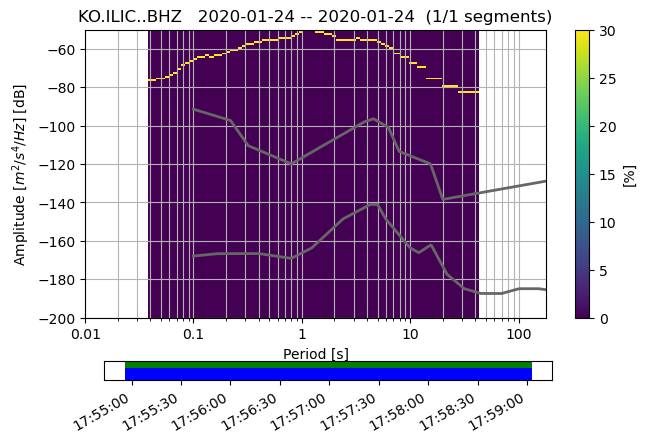

In [3]:
tr_p=st.select(id="KO.ILIC..BHZ")[0]
print(tr_p)
inventory=obspy.read_inventory(r'/home/master/Desktop/Workspace/EarthML/obspy/data/erz_ınv.xml')
print(inventory)
metadata=inventory.get_response(tr_p.id,tr_p.stats.starttime)
print(metadata)
ppsd = PPSD(tr_p.stats, metadata=inventory,ppsd_length=247.1)
ppsd.add(st)
ppsd.plot()

bir günü kapsayan başka bir stream

In [4]:
st = read(r"/home/master/Desktop/Workspace/EarthML/obspy/data/japan_day.mseed")
print(st)

tr=st.select(id="G.INU.00.BHE")[0]

11 Trace(s) in Stream:
G.INU.00.BHE | 2020-01-02T00:00:00.011304Z - 2020-01-02T23:59:58.961304Z | 20.0 Hz, 1727980 samples
G.INU.00.BHN | 2020-01-02T00:00:00.011303Z - 2020-01-02T23:59:58.961303Z | 20.0 Hz, 1727980 samples
G.INU.00.BHZ | 2020-01-02T00:00:00.011303Z - 2020-01-02T23:59:58.961303Z | 20.0 Hz, 1727980 samples
G.INU.00.LHE | 2020-01-02T00:00:41.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 86358 samples
G.INU.00.LHE | 2020-01-02T00:00:00.511303Z - 2020-01-02T00:00:40.511303Z | 1.0 Hz, 41 samples
G.INU.00.LHN | 2020-01-02T00:00:00.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 86399 samples
G.INU.00.LHZ | 2020-01-02T00:00:00.511304Z - 2020-01-02T23:59:58.511304Z | 1.0 Hz, 86399 samples
G.INU.00.LME | 2020-01-02T00:00:00.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 86399 samples
G.INU.00.LMN | 2020-01-02T00:00:00.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 86399 samples
G.INU.00.LMZ | 2020-01-02T00:07:43.511303Z - 2020-01-02T23:59:58.511303Z | 1.0 Hz, 85936 samples
G

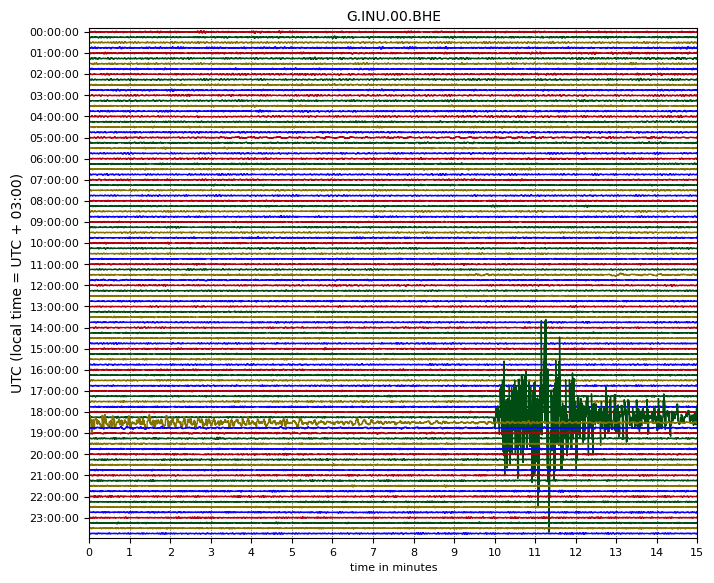

In [5]:
tr.plot(type='dayplot',vertical_scaling_range=2e4)
plt.show()
#burada deprem olması noise ı ve ppsd yi etkiliyor mu? 
# etkiliyorsa sadece arka plan gürültüsün olduğu bir stream i nasıl elde edebiliriz?

In [6]:
inv=read_inventory(r"/home/master/Desktop/Workspace/EarthML/obspy/data/japan_ppsd.xml")

#Lets have a look inside metadata
print(inv)
#choose a network in inventory
net=inv[0]
#choose a station in the network
sta=net[0]
#choose a channel in the station
cha=sta[0]
print(cha)

Inventory created at 2024-09-01T15:17:41.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://ws.resif.fr/fdsnws/station/1/query
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (1):
			G
		Stations (1):
			G.INU (Inuyama, Japan)
		Channels (9):
			G.INU.00.BHZ, G.INU.00.BHN, G.INU.00.BHE, G.INU.00.LHZ, 
			G.INU.00.LHN, G.INU.00.LHE, G.INU.00.LMZ, G.INU.00.LMN, 
			G.INU.00.LME
Channel 'BHE', Location '00' 
	Time range: 2007-12-18T00:00:00.000000Z - 2500-12-31T23:59:59.000000Z
	Latitude: 35.3500, Longitude: 137.0290, Elevation: 132.0 m, Local Depth: 0.0 m
	Azimuth: 90.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 20.00 Hz
	Sensor (Description): None (STRECKEISEN STS1)
	Response information available


In [13]:
ppsd= PPSD(tr.stats, metadata=inv)
ppsd.add(st)

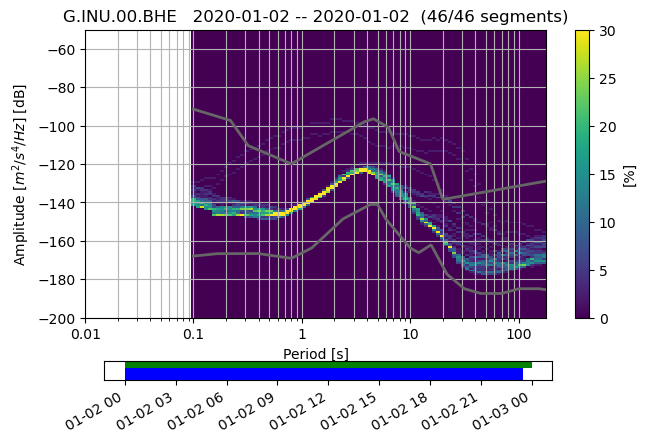

In [15]:
ppsd.plot()

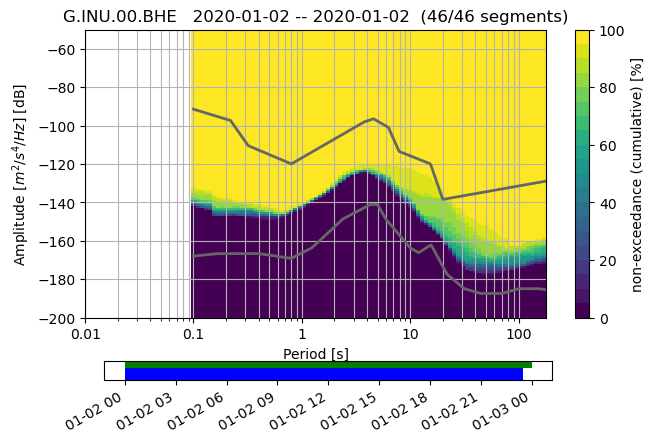

In [16]:
ppsd.plot(cumulative=True)

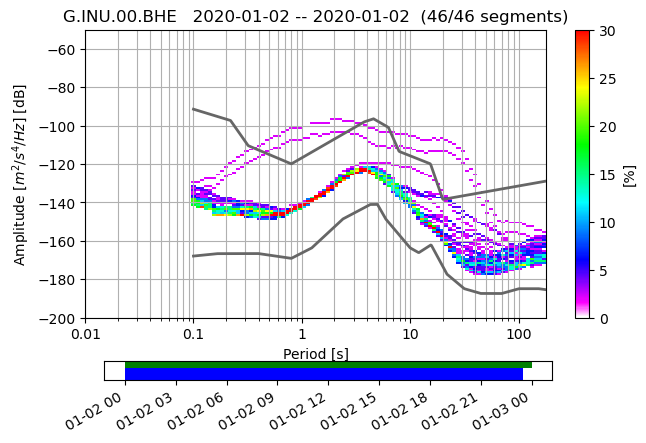

In [19]:
ppsd.plot(cmap=pqlx)

tüm ppsd grafiklerinde üstte ve altta aynı gri çizgiler oluşuyor. bunlar önceden belirlenmiş templateler mi

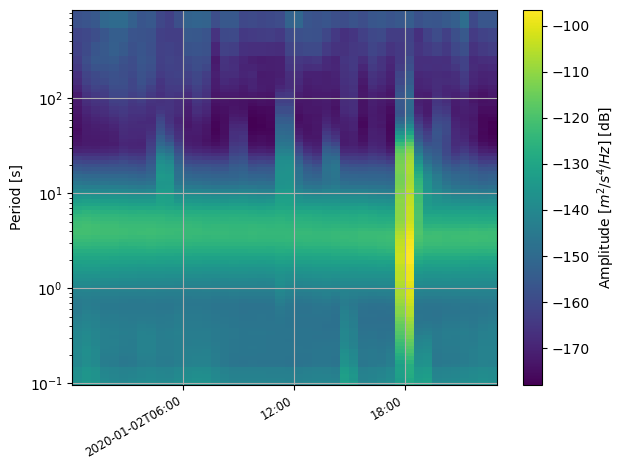

In [20]:
ppsd.plot_spectrogram()

KO.ILIC..BHZ | 2020-01-24T17:54:55.820000Z - 2020-01-24T17:59:02.920000Z | 50.0 Hz, 12356 samples


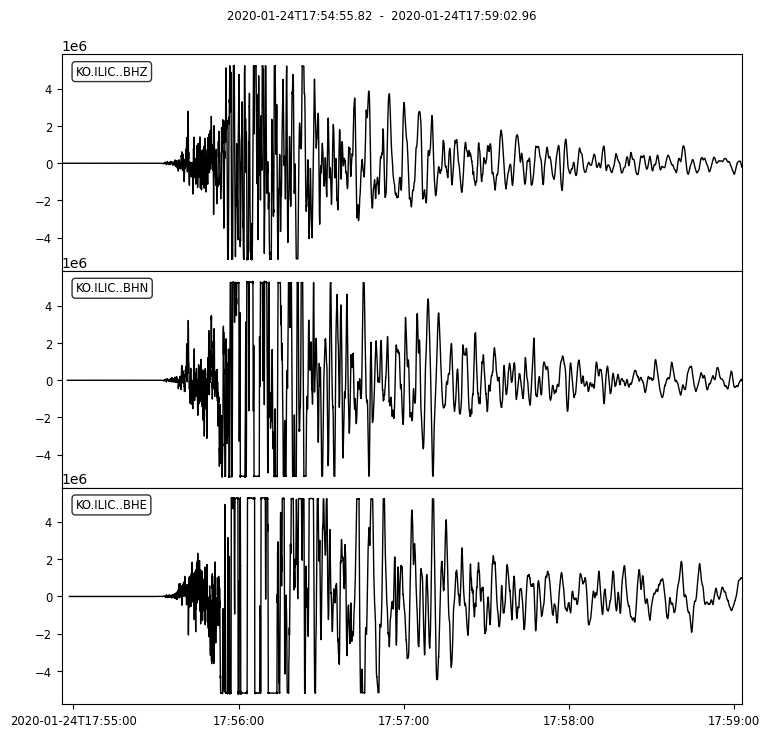

In [22]:
st=read(r'/home/master/Desktop/Workspace/EarthML/obspy/data/erz.mseed')
tr=st.select(component="Z")[0]
inv= read_inventory(r"/home/master/Desktop/Workspace/EarthML/obspy/data/erz_inv.xml")
print(tr)
st.plot()
plt.show()

In [34]:
i=1
import numpy as np
from obspy.signal.trigger import plot_trigger, classic_sta_lta ,trigger_onset

time window 5-10
treshold 1.7-0.2

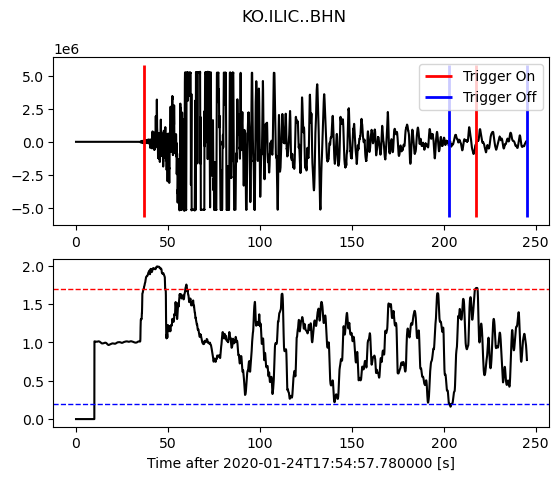

In [33]:
df=st[i].stats.sampling_rate
cft=classic_sta_lta(st[i].data, int(5 * df), int(10 * df))
plot_trigger(st[i],cft,1.7,0.2)

treshold 1.5-0.5

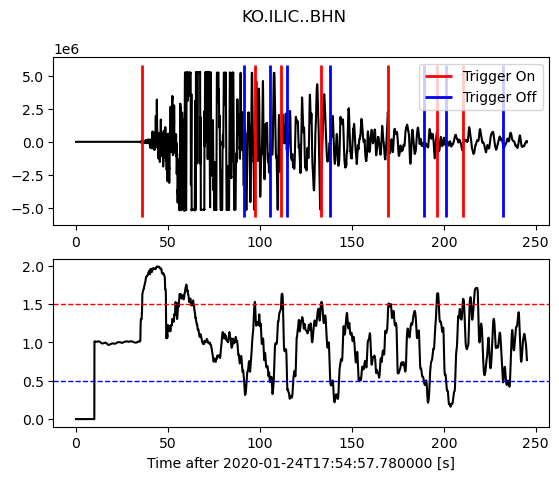

In [38]:
df=st[i].stats.sampling_rate
cft=classic_sta_lta(st[i].data, int(5 * df), int(10 * df))
plot_trigger(st[i],cft,1.5,0.5)

In [39]:
onof=trigger_onset(cft, 1.5,0.5)
print(onof.shape)

(7, 2)


absolute time bulma

In [40]:
print(onof)

[[ 1799  4569]
 [ 4854  5266]
 [ 5578  5736]
 [ 6661  6911]
 [ 8493  9455]
 [ 9802 10061]
 [10510 11601]]


In [42]:
st[0].stats.sampling_rate

50.0

In [43]:
sampling_rt=st[0].stats.sampling_rate
time=st[0].stats.starttime+(onof[0,0]/sampling_rt)
print(time)

2020-01-24T17:55:34.520000Z


In [44]:
detection_times=[]
for i in np.arange(0, onof.shape[0]):
    time=st[0].stats.starttime+(onof[i,0]/sampling_rt)
    detection_times.append(time)

In [45]:
detection_times

[2020-01-24T17:55:34.520000Z,
 2020-01-24T17:56:35.620000Z,
 2020-01-24T17:56:50.100000Z,
 2020-01-24T17:57:11.760000Z,
 2020-01-24T17:57:48.400000Z,
 2020-01-24T17:58:14.580000Z,
 2020-01-24T17:58:28.740000Z]